<a href="https://colab.research.google.com/github/joke24er/Machine-learning-Problems/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA and feature engineering**

In [ ]:
## Importing the training dataset with some important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

In [ ]:
## Getting an overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
df.head(7)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,N,2.0,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,Y,2.0,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00


In [ ]:
##columns with null values
null_features=[i for i in df.columns if df[i].isnull().sum()>0]


## non null columns
non_null=[i for i in df.columns if i not in null_features]


## Storing number of null values to their respective columns
null_dict={}
for i in null_features:
  null_dict[i]=df[i].isnull().sum()
print(null_dict)

{'Gender': 53, 'Income (USD)': 4576, 'Income Stability': 1683, 'Type of Employment': 7270, 'Current Loan Expenses (USD)': 172, 'Dependents': 2493, 'Credit Score': 1703, 'Has Active Credit Card': 1566, 'Property Age': 4850, 'Property Location': 356, 'Loan Sanction Amount (USD)': 340}


In [ ]:
## Using an assumption of students and pensioners are mostly unemployed let us see how many rows have them

df[(df['Profession']=='Pensioner') | (df['Profession']=='Student') | (df['Profession']=='Unemployed')]['Type of Employment'].shape[0]

2743

In [ ]:
##Checking if the number of null values in Type of employment column with Profession mentioned values above is same as theirs

df[(df['Profession']=='Pensioner') | (df['Profession']=='Student') | (df['Profession']=='Unemployed')]['Type of Employment'].isnull().sum()

2743

In [ ]:
## Since it was established that Type of employment is null for Pensioner,Student and filling null in type of employment
for i in range(df.shape[0]):
  if df['Profession'].iloc[i] in ['Pensioner','Student','Unemployed']:

    df['Type of Employment'].iloc[i] = df['Profession'].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
## Categorising rest of null values as 'unknown' in the Type of employment column

df['Type of Employment'].fillna('unknown',inplace=True)

In [ ]:
##Checking if all values in the Type of employment column values have been imputed

df['Type of Employment'].isnull().sum()

0

In [ ]:
## A function visualise categorical variable categories' median loan sanction amount against the categories

def viz(i,num1,num2):
  gg=df.groupby(i)['Loan Sanction Amount (USD)'].agg('median').reset_index()
  sns.barplot(x=i,y='Loan Sanction Amount (USD)', data=gg)
  plt.rcParams['figure.figsize']=num1,num2
  plt.show()

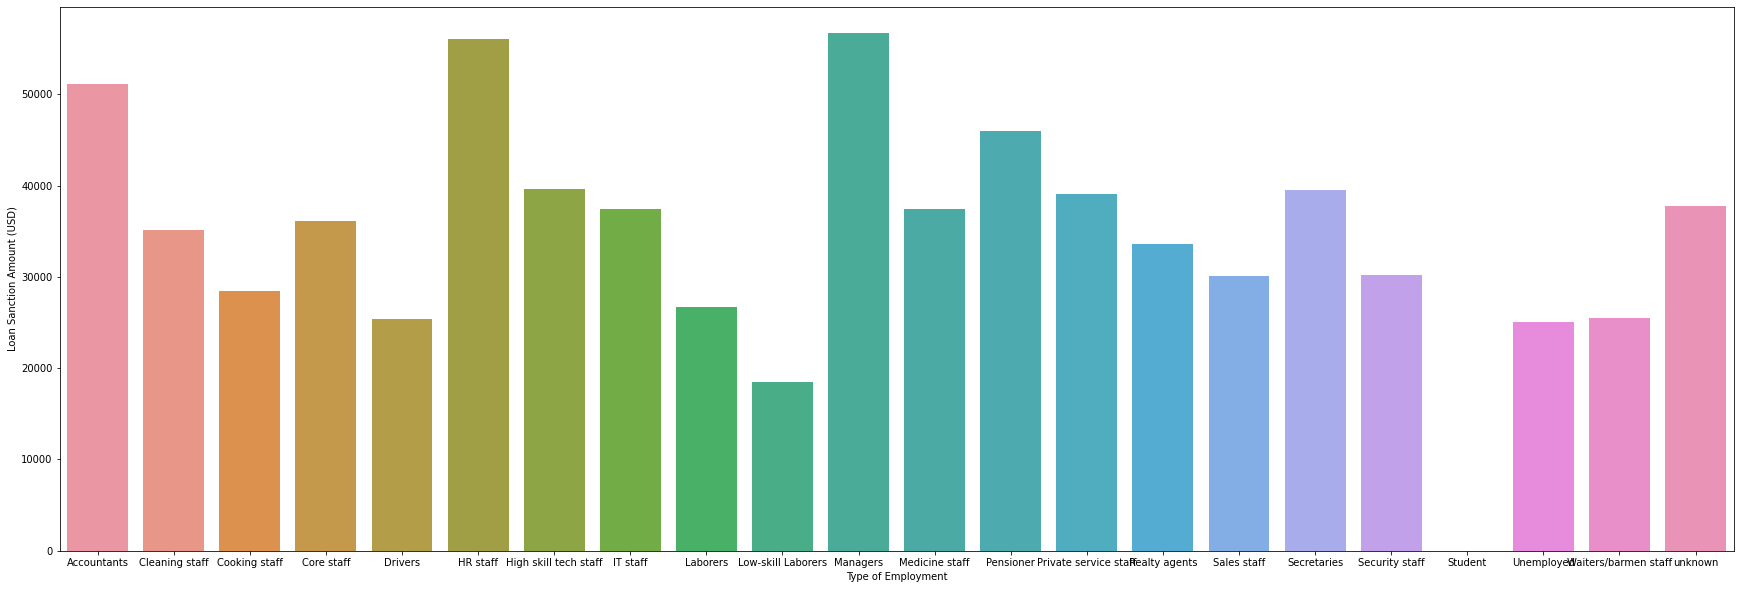

In [ ]:
## Investigating how the median of loan sanction amount differs by type of employment

viz('Type of Employment',30,10)

It can be observed Managers, HR Staff, Accountants and pensioner get higher loans sanctioned when compared to cooking staff,low skill laborers,laborer, waiters ,unemployed and cleaning staff.
Unknown segment also gets a sizeable sanction

In [ ]:
## Checking the number of unique features in the column Income Stability

df['Income Stability'].unique()

array(['Low', 'High', nan], dtype=object)

In [ ]:
## Number of null values in Income Stability Column

df['Income Stability'].isnull().sum()

1683

In [ ]:
## The Income stability for an unknown type of employment is likely low which is to be investigated

df[df['Type of Employment']=='unknown']['Income Stability'].unique()

array(['Low', nan], dtype=object)

As suspected not a single high income stability value exists for unknown type of employment hence it is safe to assume the income stability is low for the unknown type of employment

In [ ]:
## Checking Income Stability for Profession category Working
df[df['Profession']=='Working']['Income Stability'].unique()

array(['Low', nan], dtype=object)

Similar to unknown type of employment the profession with category working doesn't have a single High value hence the income stability for working profession is Low

In [ ]:
## How many null Income Stability fields with profession working

df[df['Profession']=='Working']['Income Stability'].isnull().sum()

935

In [ ]:
## Replacing all null values with Profession working in the Income Stability field as low

for i in range(df.shape[0]):
  if df['Profession'].iloc[i]=='Working':
    df['Income Stability'].iloc[i]='Low'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
## Profession values with null Income Stability

is_cols=df[df['Income Stability'].isnull()]['Profession'].unique()
print(is_cols)

['Commercial associate' 'Pensioner' 'State servant' 'Student'
 'Businessman']


In [ ]:
## Investigating Income stability with null values for the Profession categories 

gg=df.groupby('Profession')['Income Stability']
for i in is_cols:
  print(i,gg.get_group(i).unique())

Commercial associate ['Low' nan]
Pensioner ['High' nan]
State servant ['Low' nan]
Student [nan]
Businessman ['Low' nan]


Since All the categories of profession have singular Income Stability hence it makes sense to fill the null values just as above

In [ ]:
## Imputing null values for Income Stability

for i in range(df.shape[0]):
  if df['Profession'].iloc[i] in ['Businessman','State servant', 'Commercial associate','Student']:
    df['Income Stability'].iloc[i]='Low'
  
  if df['Profession'].iloc[i]=='Pensioner':
    df['Income Stability'].iloc[i]='High'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
## Checking if all null values are imputed in Income Stability

df['Income Stability'].isnull().sum()

0

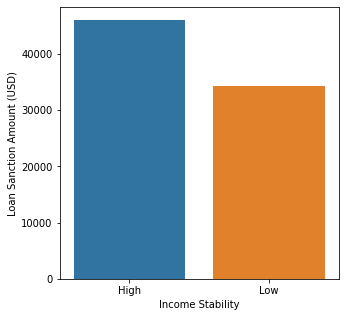

In [ ]:
## Investigating Income stability against the median loan sanction amount of their its categories

viz('Income Stability',5,5)

It can be implied that people with High Income stability have higher Loan Sanction amount than the ones with low income stability


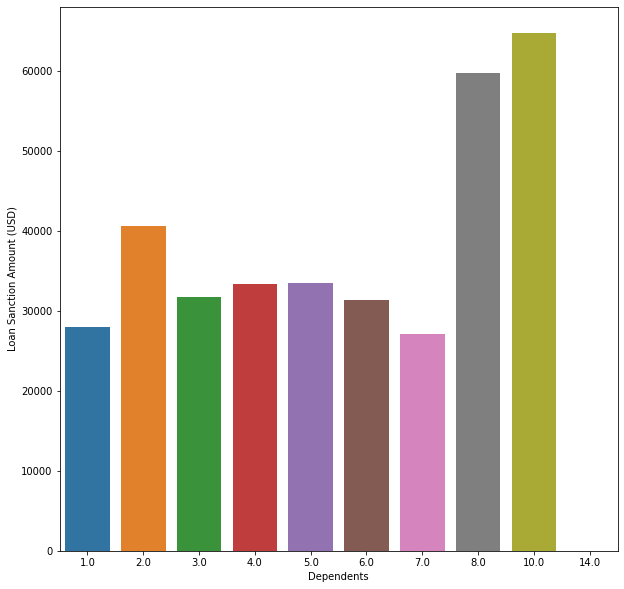

In [ ]:
##Investigating for Dependents against the Loan Sanction amount

viz('Dependents',10,10)

Looking and no. of dependents 8 and 10 to draw conclusions

In [ ]:
df[(df['Dependents']==8.0) | (df['Dependents']==10)]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
622,C-5455,Donya Sarmiento,F,44,2132.36,Low,Working,High skill tech staff,Semi-Urban,85248.42,231.01,N,N,8.0,706.84,0,Unpossessed,373,NaN,1,Semi-Urban,1,103631.49,59673.89
11171,C-32637,Lorriane Jasinski,F,46,2714.12,Low,Commercial associate,Sales staff,Semi-Urban,99542.76,486.28,N,N,10.0,654.18,0,Inactive,250,2714.12,4,Semi-Urban,1,109647.12,64702.79


Not enough relationship is established between number of dependents and Loan Sanction Amount

In [ ]:
## Dropping all rows with null Loan Sanction Amount fields

df=df[df['Loan Sanction Amount (USD)'].notnull()]

In [ ]:
##function for comparing median of one field by category of another
def viz1(i,j):
  kk=df.groupby(i)[j].agg('median').reset_index()
  print(kk)
  sns.barplot(x=i,y=j,data=kk)
  plt.show()

     Location  Credit Score
0       Rural       722.055
1  Semi-Urban       739.380
2       Urban       775.020


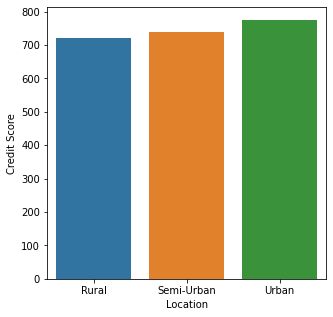

In [ ]:
viz1('Location','Credit Score')

It can be seen people at Urban location have a little higher credit score than the other locations 

In [ ]:

df.Location.value_counts()

Semi-Urban    21317
Rural          5280
Urban          3063
Name: Location, dtype: int64

  Income Stability  Credit Score
0             High        819.26
1              Low        732.10


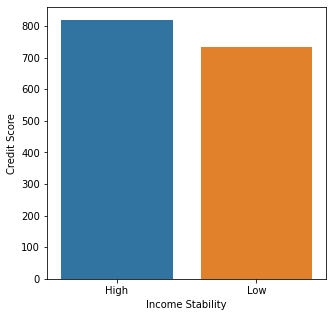

In [ ]:
## Investigating Income Stability against Credit Score

viz1('Income Stability','Credit Score')

People with High Income Stability tend to have higher Credit Score

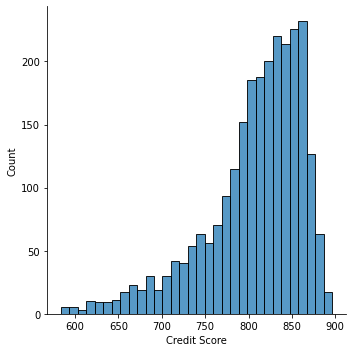

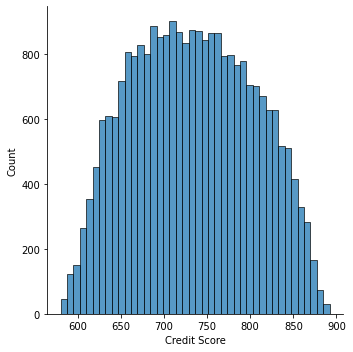

In [ ]:
##Plotting the distribution of credit scores

sns.displot(df[df['Income Stability']=='High']['Credit Score'])
plt.show()

sns.displot(df[df['Income Stability']=='Low']['Credit Score'])
plt.show()

In [ ]:
## With the conclusion Drawn above we can impute th null values of the Credit Scores with the median scores of Income Stability
k=list(df['Credit Score'].isnull())
for i in range(df.shape[0]):
  if k[i]:
    if df['Income Stability'].iloc[i]=='High':
      df['Credit Score'].iloc[i]=819.26
    else:
      df['Credit Score'].iloc[i]=732.10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


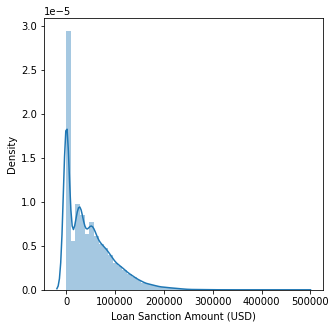

In [ ]:
## Looking at the distribution of Loan Sanction Amount

sns.distplot(df['Loan Sanction Amount (USD)'])

In [ ]:
## Genderwise division of the data

df.Gender.value_counts()

M    14890
F    14718
Name: Gender, dtype: int64

In [ ]:
## Just for Randomness since the number of F is low imputing null values in gender with F
df['Gender'].fillna('F',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
## Filling the null values in Property Location column category unavail

df['Property Location'].fillna('unavail',inplace=True)

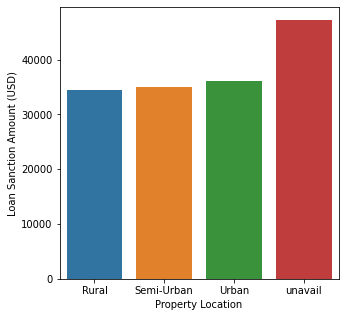

In [ ]:
##Investigating Property Location against Loan Sanction Amount

viz('Property Location',5,5)

It can be noticed that the median Loan Sanction Amount is unusually high for unavail category

In [ ]:
## Imputing null values of the Has Active Credit card with nope

df['Has Active Credit Card'].fillna('nope',inplace=True)

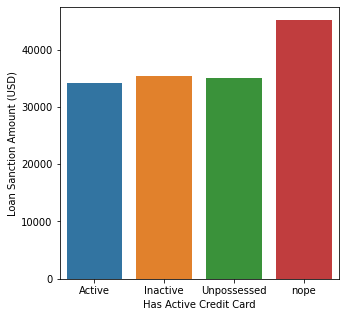

In [ ]:
## Investigating Has Active Credit against Loan Sanction Amount

viz('Has Active Credit Card',5,5)

Our imputed null values in Has a active credit card columns seem to have higher median for loan sanction amount

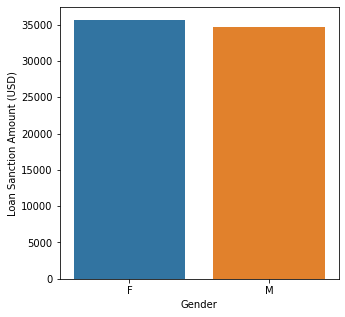

In [ ]:
## Investigating Gender against the Loan Sanction Amount

viz('Gender',5,5)

The Loan Sanction amount genderwise seems evenly poised

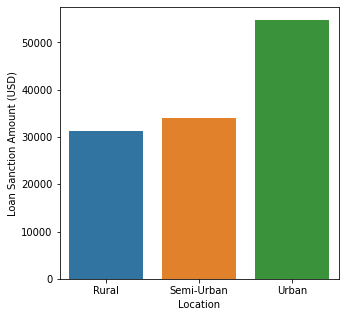

In [ ]:
viz('Location',5,5)

People at Urban location tend to have Higher loan sanctioned

In [ ]:
### Creating a Column with Customer ID integers (number followed by C-)

df['Cuslen']=df['Customer ID'].apply(lambda x: int(x[2:]))

In [ ]:
df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Cuslen
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,nope,746,1933.05,4,Rural,1,119933.46,54607.18,36995
1,C-33999,America Calderone,M,32,4952.91,Low,Working,unknown,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98,33999
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,Pensioner,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43,3770
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,Pensioner,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54,26480
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28,23459


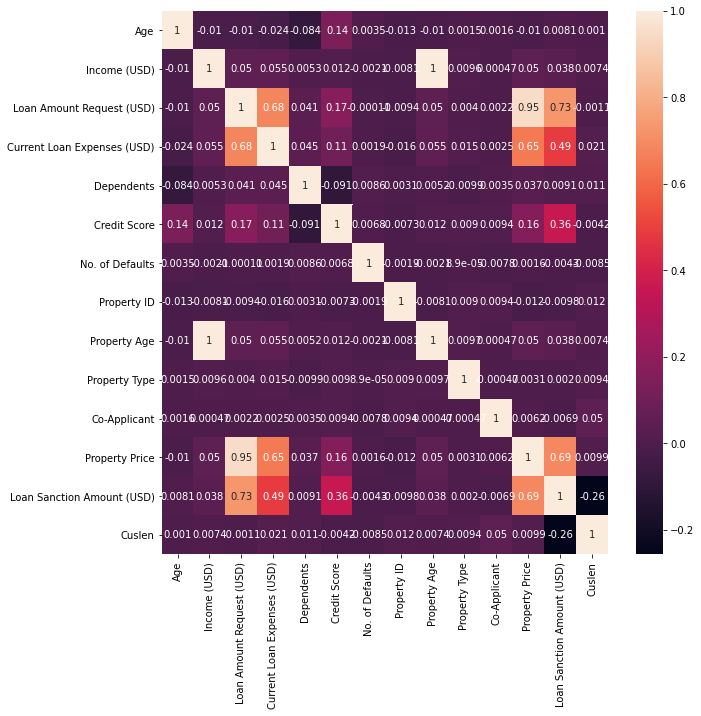

In [ ]:
##Getting The correlations by visualising the heatmap

k=df.corr()
sns.heatmap(k,annot=True)
plt.rcParams["figure.figsize"]=10,10
plt.show()

There seems to be a correlation between Loan Sanction Amount(USD) and columns Loan amount request, current loan expenses, credit score, property price and cuslen

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29660 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  29660 non-null  object 
 1   Name                         29660 non-null  object 
 2   Gender                       29660 non-null  object 
 3   Age                          29660 non-null  int64  
 4   Income (USD)                 25167 non-null  float64
 5   Income Stability             29660 non-null  object 
 6   Profession                   29660 non-null  object 
 7   Type of Employment           29660 non-null  object 
 8   Location                     29660 non-null  object 
 9   Loan Amount Request (USD)    29660 non-null  float64
 10  Current Loan Expenses (USD)  29493 non-null  float64
 11  Expense Type 1               29660 non-null  object 
 12  Expense Type 2               29660 non-null  object 
 13  Dependents      

In [ ]:
##Feature Engineering


dataset=df.copy()

## Droping Columns with multicollinearity with Loan amount request
dataset.drop(columns=['Property Price','Current Loan Expenses (USD)'],inplace=True)


##Dropping the remaining columns containing null values
dataset.dropna(axis=1,inplace=True)
dataset.drop(columns=['Customer ID','Name'],inplace=True)


## Labelling some of the ordinal Categorical Variables

for i in range(dataset.shape[0]):
  if dataset['Income Stability'].iloc[i]=='High':
    dataset['Income Stability'].iloc[i]=1
  else:
    dataset['Income Stability'].iloc[i]=0

  if dataset['Expense Type 1'].iloc[i]=='Y':
    dataset['Expense Type 1'].iloc[i]=1
  else:
    dataset['Expense Type 1'].iloc[i]=0

  if dataset['Expense Type 2'].iloc[i]=='Y':
    dataset['Expense Type 2'].iloc[i]=1
  else:
    dataset['Expense Type 2'].iloc[i]=0

  if dataset['Gender'].iloc[i]=='M':
    dataset['Gender'].iloc[i]=1
  else:
    dataset['Gender'].iloc[i]=0

  
## Filling in faulty values of Co-applicant
dataset['Co-Applicant']=dataset['Co-Applicant'].apply(lambda x: 0 if x==-999 else x)


##Label Encoding Location, Property Location, 'Has Active Credit Card
from sklearn.preprocessing import LabelEncoder
dataset['Location']=LabelEncoder().fit_transform(dataset['Location'])



dataset['Property Location']=LabelEncoder().fit_transform(dataset['Property Location'])




dataset['Has Active Credit Card']=LabelEncoder().fit_transform(dataset['Has Active Credit Card'])

##One hot encoding Profession and Type of Employment

k=pd.get_dummies(dataset['Profession'])
dataset=pd.concat([dataset,k],axis=1)
dataset.drop(columns='Profession',inplace=True)




k=pd.get_dummies(dataset['Type of Employment'])
dataset=pd.concat([dataset,k],axis=1)
dataset.drop(columns='Type of Employment',inplace=True)



#dataset=dataset[dataset['Loan Sanction Amount (USD)']!=-999]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#**Predictive modelling**

In [ ]:
##Final proprecessing followed by splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split

dataset['Income Stability']=dataset['Income Stability'].astype('int')
dataset['Expense Type 1']=dataset['Expense Type 1'].astype('int')
dataset['Expense Type 2']=dataset['Expense Type 2'].astype('int')
dataset['Gender']=dataset['Gender'].astype('int')
dataset = dataset.loc[:,~dataset.columns.duplicated()]


xtrain,xtest,ytrain,ytest=train_test_split(dataset.drop(columns=['Loan Sanction Amount (USD)']),dataset['Loan Sanction Amount (USD)'],test_size=0.2)

In [ ]:
##Random Forest model


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)

print(r2_score(ytest,pred))

0.9591852042623771


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
grid = {
    'bootstrap': [True],
    'max_depth': [i for i in range (10,120,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [i for i in range(200,2100,100)]
}
r=RandomForestRegressor()
rf=RandomizedSearchCV(estimator = r, param_distributions = grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)

print(r2_score(ytest,pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 21.0min finished


0.9642350292256658


In [ ]:
## Gradient Bossting using xgboost

from xgboost import XGBRegressor

xgb=xgboost = XGBRegressor()
xgb.fit(xtrain,ytrain)
pred=xgb.predict(xtest)

print(r2_score(ytest,pred))

[17:56:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9598060365222507


In [ ]:
## Gradient Boosting using LightGBM

from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor()
lgb= LGBMRegressor()
lgb.fit(xtrain,ytrain)
pred=lgb.predict(xtest)

print(r2_score(ytest,pred))


0.9610578490258762


In [ ]:
## Installing catboost library

!pip install catboost

     |████████████████████████████████| 69.2MB 47kB/s 


In [ ]:
## CATBOOST regression with grid search
import catboost as cb
train_dataset = cb.Pool(xtrain, ytrain) 
test_dataset = cb.Pool(xtest, ytest)
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
pred = model.predict(xtest)
rmse = (np.sqrt(mean_squared_error(ytest, pred)))
r2 = r2_score(ytest, pred)
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Streaming output truncated to the last 5000 lines.
153:	learn: 11142.2989628	test: 11053.5133142	best: 11053.5133142 (153)	total: 775ms	remaining: 232ms
154:	learn: 11129.1077770	test: 11039.3198597	best: 11039.3198597 (154)	total: 780ms	remaining: 226ms
155:	learn: 11116.2386978	test: 11027.5448447	best: 11027.5448447 (155)	total: 785ms	remaining: 221ms
156:	learn: 11098.0823294	test: 11017.0063774	best: 11017.0063774 (156)	total: 790ms	remaining: 216ms
157:	learn: 11085.5567374	test: 11016.5934843	best: 11016.5934843 (157)	total: 794ms	remaining: 211ms
158:	learn: 11068.8279700	test: 11011.6773465	best: 11011.6773465 (158)	total: 799ms	remaining: 206ms
159:	learn: 11058.5561938	test: 11000.0406692	best: 11000.0406692 (159)	total: 804ms	remaining: 201ms
160:	learn: 11046.0899107	test: 10990.6199961	best: 10990.6199961 (160)	total: 809ms	remaining: 196ms
161:	learn: 11037.5997029	test: 10985.5794952	best: 10985.5794952 (161)	total: 813ms	remaining: 191ms
162:	learn: 11026.3442241	test:

#**Prediction on the test file**

In [ ]:
##Test Wrapper for feature engineering and null value imputation performed in our training dataset

def test_impute(df):
  for i in range(df.shape[0]):
    if df['Profession'].iloc[i] in ['Pensioner','Student','Unemployed']:

      df['Type of Employment'].iloc[i] = df['Profession'].iloc[i]

  for i in range(df.shape[0]):
    if df['Profession'].iloc[i] in ['Businessman','State servant', 'Commercial associate','Student']:
      df['Income Stability'].iloc[i]='Low'
    
    if df['Profession'].iloc[i]=='Pensioner':
      df['Income Stability'].iloc[i]='High'


  df['Type of Employment'].fillna('unknown',inplace=True)

  df['Has Active Credit Card'].fillna('nope',inplace=True)


  for i in range(df.shape[0]):
    if df['Profession'].iloc[i]=='Working':
      df['Income Stability'].iloc[i]='Low'
  k=list(df['Credit Score'].isnull())
  for i in range(df.shape[0]):
    if k[i]:
      if df['Income Stability'].iloc[i]=='High':
        df['Credit Score'].iloc[i]=819.26
      else:
        df['Credit Score'].iloc[i]=732.10

  df['Property Location'].fillna('unavail',inplace=True)

  




test=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test['Cuslen']=test['Customer ID'].apply(lambda x: int(x[2:]))

In [ ]:
test_impute(test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19999 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           20000 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [ ]:
## Filling in the leftover Income Stability
test[test['Income Stability'].isnull()]['Income Stability']

5718    NaN
Name: Income Stability, dtype: object

In [ ]:
test['Income Stability'].fillna('Low',inplace=True)

In [ ]:
test['Gender'].fillna('F',inplace=True)

In [ ]:
##Applying the same feature engineering from training set to our test set


dataset=test.copy()
dataset.drop(columns=['Property Price','Current Loan Expenses (USD)'],inplace=True)
#dataset.drop(columns=['Credit Score'],inplace=True)
dataset.dropna(axis=1,inplace=True)
dataset.drop(columns=['Customer ID','Name'],inplace=True)
def viz(i):
  gg=dataset.groupby(i)['Loan Sanction Amount (USD)'].agg('median').reset_index()
  sns.barplot(x=i,y='Loan Sanction Amount (USD)', data=gg)
  plt.show()
for i in range(dataset.shape[0]):
  if dataset['Income Stability'].iloc[i]=='High':
    dataset['Income Stability'].iloc[i]=1
  else:
    dataset['Income Stability'].iloc[i]=0

  if dataset['Expense Type 1'].iloc[i]=='Y':
    dataset['Expense Type 1'].iloc[i]=1
  else:
    dataset['Expense Type 1'].iloc[i]=0

  if dataset['Expense Type 2'].iloc[i]=='Y':
    dataset['Expense Type 2'].iloc[i]=1
  else:
    dataset['Expense Type 2'].iloc[i]=0

  if dataset['Gender'].iloc[i]=='M':
    dataset['Gender'].iloc[i]=1
  else:
    dataset['Gender'].iloc[i]=0

  

dataset['Co-Applicant']=dataset['Co-Applicant'].apply(lambda x: 0 if x==-999 else x)
from sklearn.preprocessing import LabelEncoder
dataset['Location']=LabelEncoder().fit_transform(dataset['Location'])





from sklearn.preprocessing import LabelEncoder
dataset['Property Location']=LabelEncoder().fit_transform(dataset['Property Location'])




dataset['Has Active Credit Card']=LabelEncoder().fit_transform(dataset['Has Active Credit Card'])



k=pd.get_dummies(dataset['Profession'])
dataset=pd.concat([dataset,k],axis=1)
dataset.drop(columns='Profession',inplace=True)




k=pd.get_dummies(dataset['Type of Employment'])
dataset=pd.concat([dataset,k],axis=1)
dataset.drop(columns='Type of Employment',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dataset['Income Stability']=dataset['Income Stability'].astype('int')
dataset['Expense Type 1']=dataset['Expense Type 1'].astype('int')
dataset['Expense Type 2']=dataset['Expense Type 2'].astype('int')
dataset['Gender']=dataset['Gender'].astype('int')
dataset = dataset.loc[:,~dataset.columns.duplicated()]


In [ ]:
##Investigating for erronous value
dataset['Co-Applicant'].unique()

array(['1', '0', '?'], dtype=object)

In [ ]:
## Fixing the column
dataset['Co-Applicant'].replace('?','0',inplace=True)

In [ ]:
## Checking for Businessman in test set since it is present in the trained dataset
test[test['Profession']=='Businessman']

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Cuslen


In [ ]:
## Since there is no feature for Businessman for the sake of consistency we add it to keep the one hot ending intact
dataset['Businessman']=0

In [ ]:
## Taking out object types
dataset['Co-Applicant']=dataset['Co-Applicant'].astype('int')

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     20000 non-null  int64  
 1   Age                        20000 non-null  int64  
 2   Income Stability           20000 non-null  int64  
 3   Location                   20000 non-null  int64  
 4   Loan Amount Request (USD)  20000 non-null  float64
 5   Expense Type 1             20000 non-null  int64  
 6   Expense Type 2             20000 non-null  int64  
 7   Credit Score               20000 non-null  float64
 8   No. of Defaults            20000 non-null  int64  
 9   Has Active Credit Card     20000 non-null  int64  
 10  Property ID                20000 non-null  int64  
 11  Property Type              20000 non-null  int64  
 12  Property Location          20000 non-null  int64  
 13  Co-Applicant               20000 non-null  int

In [ ]:
## Creating the prdiction file with the best trained model

prediction=model.predict(dataset)
test['Loan Sanction Amount (USD)']=prediction
submission=test[['Customer ID','Loan Sanction Amount (USD)']]
submission['Loan Sanction Amount (USD)']=submission['Loan Sanction Amount (USD)'].apply(lambda x: 0 if (x<0) else x)
submission.to_csv('submit.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,98034.363553
1,C-35067,77633.680393
2,C-34590,2788.854043
3,C-16668,69459.253459
4,C-12196,78778.662239
...,...,...
19995,C-9076,105769.637831
19996,C-17587,33177.031224
19997,C-46479,0.000000
19998,C-3099,70873.441089
